In [567]:
# Important libaries
import pandas as pd
import seaborn as sns
import numpy as np
import nltk

In [568]:
# Read TSV data
columns = ["ID", "label_6", "statement", "subject", "speaker", "speaker_job", "state", "party", "pof_count", "false_count", "barelytrue_count", "halftrue_count", "mostlytrue_count", "context"]
train_data = pd.read_table("/kaggle/input/LIARbyYang/train.tsv", header = None, names = columns)
cv_data = pd.read_table("/kaggle/input/LIARbyYang/valid.tsv", header = None, names = columns)
test_data = pd.read_table("/kaggle/input/LIARbyYang/test.tsv", header = None, names = columns)


Here we do not want to merge the three tables provided. Next, check the data:

In [569]:
train_data.head(10)

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [570]:
train_data.shape

(10240, 14)

# Relabel

We want to merge the labels from 6-ways to 2 and 3-ways, while keeping the original 6-ways labels for the benchmark.

In [571]:
merger_2 = { 'pants-fire' : 0,
           'false' : 0,
           'barely-true': 0,
           'half-true': 0,
           'mostly-true': 1,
           'true': 1}
merger_3 = { 'pants-fire' : 0,
           'false' : 0,
           'barely-true': 1,
           'half-true': 1,
           'mostly-true': 2,
           'true': 2}
merger_6 = { 'pants-fire' : 0,
           'false' : 1,
           'barely-true': 2,
           'half-true': 3,
           'mostly-true': 4,
           'true': 5}

# training set
train_data['label_2'] = train_data["label_6"].map(merger_2)
train_data['label_3'] = train_data["label_6"].map(merger_3)
train_data["label_6"].replace(merger_6, inplace = True)

# cross validation set
cv_data['label_2'] = cv_data["label_6"].map(merger_2)
cv_data['label_3'] = cv_data["label_6"].map(merger_3)
cv_data["label_6"].replace(merger_6, inplace = True)

# test set
test_data['label_2'] = test_data["label_6"].map(merger_2)
test_data['label_3'] = test_data["label_6"].map(merger_3)
test_data["label_6"].replace(merger_6, inplace = True)

# check
train_data.head(10)

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,context,label_2,label_3
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,0
1,10540.json,3,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,0,1
2,324.json,4,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,2
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,0
4,9028.json,3,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0,1
5,12465.json,5,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,1,2
6,2342.json,2,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,0,1
7,153.json,3,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",0,1
8,5602.json,3,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,0,1
9,9741.json,4,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,1,2


# Bag of Words Process

In [572]:
# tokenization processes


from nltk.corpus import stopwords
import string
from nltk.tokenize import WhitespaceTokenizer as w_tokenizer
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# remove stopwords
def remove_stopwords(list_of_tokens):
    new_list_of_tokens = [w for w in list_of_tokens if not w.lower() in stop_words]
    return new_list_of_tokens

# remove punctutations and tokens with less than two in length
def remove_punctuations_shortwords(list_of_tokens):
    translation = str.maketrans('', '', string.punctuation)
    new_list_of_tokens = [tokens.translate(translation) for tokens in list_of_tokens if len(tokens.translate(translation))>=3]
    return new_list_of_tokens

def tokenize_and_stem(Pandas_Series):
    Pandas_Series = Pandas_Series.replace('\d+', '', regex=True) # remove numbers
    Pandas_Series = Pandas_Series.apply(nltk.word_tokenize) # tokenize statement
    Pandas_Series = Pandas_Series.apply(remove_stopwords) # remove stopwords
    Pandas_Series = Pandas_Series.apply(remove_punctuations_shortwords) # remove punctutations and tokens with less than two in length
    Pandas_Series = Pandas_Series.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
    return Pandas_Series
    
    


In [573]:
train_data['stemmed_statement_token'] = tokenize_and_stem(train_data['statement']) # Process statement strings

In [574]:
train_data['stemmed_statement_token']

0        [say, anni, list, polit, group, support, third...
1        [declin, coal, start, start, natur, gas, took,...
2        [hillari, clinton, agre, john, mccain, vote, g...
3        [health, care, reform, legisl, like, mandat, f...
4                   [econom, turnaround, start, end, term]
                               ...                        
10235    [larger, number, shark, attack, florida, case,...
10236    [democrat, becom, parti, atlanta, metro, area,...
10237    [say, altern, social, secur, oper, galveston, ...
10238          [lift, cuban, embargo, allow, travel, cuba]
10239    [depart, veteran, affair, manual, tell, vetera...
Name: stemmed_statement_token, Length: 10240, dtype: object

See the most common (and potentially useless) words for the dataset

Check for redundant words:

In [575]:
# bag of words for the whole dataset
def countwords(x):
    word2count = {}
    for words in x:
        for word in words:
            if word not in word2count.keys():
                word2count[word] = 1
            else:
                word2count[word] += 1
    # sort the word2count
    sorted_word2count = sorted(word2count.items(), key=lambda x:x[1], reverse = True)
    return sorted_word2count
            
words_in_statements = countwords(train_data["stemmed_statement_token"])
words_in_statements[0:20]

[('say', 2507),
 ('state', 1372),
 ('percent', 1189),
 ('year', 1181),
 ('tax', 1064),
 ('obama', 862),
 ('presid', 673),
 ('vote', 667),
 ('job', 640),
 ('million', 630),
 ('peopl', 605),
 ('health', 600),
 ('would', 550),
 ('care', 505),
 ('one', 474),
 ('new', 467),
 ('bill', 462),
 ('countri', 430),
 ('time', 424),
 ('american', 424)]

Apply CountVectorizer, ignore the first few rendundant words and words that appear only once.

In [576]:
from sklearn.feature_extraction.text import CountVectorizer
cv_statement = CountVectorizer(analyzer=lambda x: x, max_df = 1400 ,min_df = 100) # need analyzer=lambda x: x to disable the analyzer, since the input is pandas series of lists.
vectors = cv_statement.fit_transform(train_data['stemmed_statement_token'])

def new_features(X, string, vectorizer):
    new_features = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out()) # Get new features from countvectorizer
    new_features.columns = string+ '_' + new_features.columns # add prefix to the column names
    return new_features

statement_vector = new_features(vectors, 'st', cv_statement)


In [577]:
statement_vector.columns

Index(['st_abort', 'st_act', 'st_actual', 'st_administr', 'st_allow',
       'st_almost', 'st_america', 'st_american', 'st_averag', 'st_back',
       ...
       'st_war', 'st_weve', 'st_wisconsin', 'st_without', 'st_women',
       'st_work', 'st_worker', 'st_world', 'st_would', 'st_year'],
      dtype='object', length=189)

<Axes: ylabel='Count'>

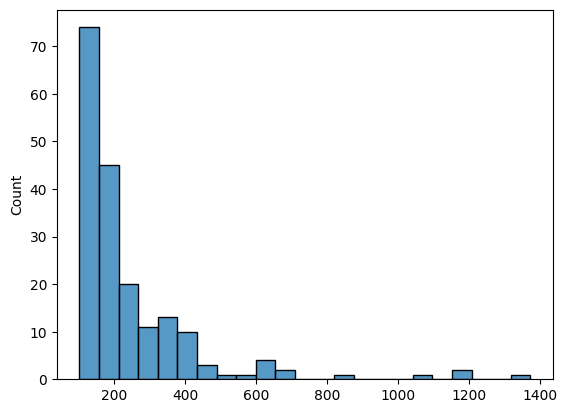

In [578]:
sns.histplot(np.sum(statement_vector, axis = 0))

Merge new features

In [579]:
train_data2 = pd.concat([train_data,statement_vector],axis=1)

In [580]:
train_data2.head()

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,...,st_war,st_weve,st_wisconsin,st_without,st_women,st_work,st_worker,st_world,st_would,st_year
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,10540.json,3,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,324.json,4,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0,0,0,0,0,0,0,0,0,0
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0,0,0,0,0,0,0,0,0,0
4,9028.json,3,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0,0,0,0,0,0,0,0,0,0


Do the same for context. But there are 102 null present, drop them first.

In [581]:
sum(train_data2['context'].isnull())

102

Suppose null value for the context is caused by unknown source, replace them with "unknown".

In [582]:
# fill null context
train_data2["context"].fillna(value = "unknown", inplace=True)

In [583]:
train_data2['stemmed_context_token'] = tokenize_and_stem(train_data2['context']) # Process context strings

Check redundant:

In [584]:
words_in_context = countwords(train_data2["stemmed_context_token"])
print(words_in_context[0:20])

[('interview', 1754), ('speech', 1062), ('news', 864), ('campaign', 807), ('debat', 767), ('press', 686), ('releas', 677), ('post', 492), ('comment', 344), ('fox', 339), ('email', 336), ('radio', 335), ('confer', 300), ('meet', 299), ('televis', 298), ('state', 288), ('presidenti', 251), ('republican', 247), ('statement', 245), ('websit', 237)]


In [585]:
len(words_in_context)

1907

Apply vectorizer:

In [586]:
cv_context = CountVectorizer(analyzer=lambda x: x, max_df = 1800 ,min_df = 50) # need analyzer=lambda x: x to disable the analyzer, since the input is pandas series of lists.
vectors = cv_context.fit_transform(train_data2['stemmed_context_token'])
context_vector = new_features(vectors, 'ct', cv_context)

In [587]:
context_vector.columns

Index(['ct_abc', 'ct_address', 'ct_advertis', 'ct_appear', 'ct_articl',
       'ct_austin', 'ct_blog', 'ct_broadcast', 'ct_campaign', 'ct_cbs',
       'ct_chain', 'ct_cnn', 'ct_column', 'ct_comment', 'ct_commentari',
       'ct_commerci', 'ct_committe', 'ct_confer', 'ct_convent', 'ct_daili',
       'ct_debat', 'ct_democrat', 'ct_discuss', 'ct_email', 'ct_event',
       'ct_face', 'ct_facebook', 'ct_fla', 'ct_floor', 'ct_florida',
       'ct_forum', 'ct_fox', 'ct_fundrais', 'ct_hall', 'ct_hampshir',
       'ct_hear', 'ct_hous', 'ct_internet', 'ct_interview', 'ct_iowa',
       'ct_journal', 'ct_letter', 'ct_mailer', 'ct_media', 'ct_meet',
       'ct_messag', 'ct_morn', 'ct_msnbc', 'ct_nation', 'ct_nbc', 'ct_new',
       'ct_news', 'ct_newspap', 'ct_ohio', 'ct_onlin', 'ct_ope', 'ct_opinion',
       'ct_parti', 'ct_polit', 'ct_post', 'ct_presidenti', 'ct_press',
       'ct_radio', 'ct_ralli', 'ct_releas', 'ct_remark', 'ct_report',
       'ct_republican', 'ct_senat', 'ct_show', 'ct_site', '

<Axes: ylabel='Count'>

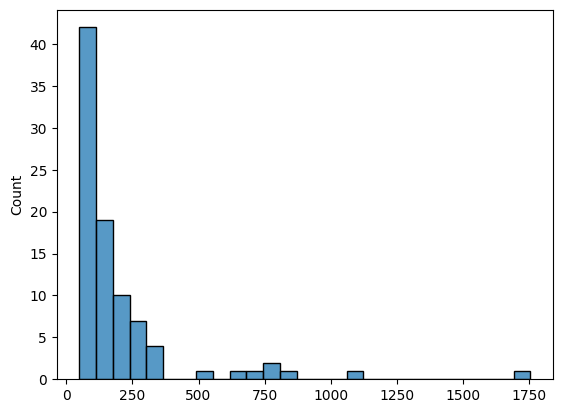

In [588]:
sns.histplot(np.sum(context_vector, axis = 0))

In [589]:
train_data3 = pd.concat([train_data2,context_vector],axis=1)
train_data3.shape

(10240, 297)

Do the same for subject. Now, the tokens are separated by commas in this case. Thus, change them to spaces before tokenizing them.

In [590]:
sum(train_data3['subject'].isnull()) #check number of nulls

2

In [591]:
train_data3[train_data3['subject'].isnull()]

,ID,label_6,statement,subject,speaker,speaker_job,state,party,pof_count,false_count,...,ct_town,ct_tweet,ct_twitter,ct_union,ct_unknown,ct_video,ct_washington,ct_web,ct_websit,ct_week
2142,638.json,1,The fact is that although we have had a presid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
9375,1626.json,1,"Joe, I keep hearing you every morning talking ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


There are two nulls to get rid of. Replace them with "unknown".

In [592]:
# fill null subject
train_data3["subject"].fillna(value = "unknown", inplace=True)

Apply defined tokenizer:

In [593]:
train_data3['subject'].replace(',',' ',regex=True,inplace=True)  # turn commas to blank spaces
train_data3['stemmed_subject_token'] = tokenize_and_stem(train_data3['subject']) # Process subject strings

Check redundant:

In [594]:
words_in_subject = countwords(train_data3["stemmed_subject_token"])
print(words_in_subject[0:20])

[('economi', 1162), ('healthcar', 1128), ('tax', 994), ('federalbudget', 744), ('educ', 728), ('job', 711), ('statebudget', 696), ('candidatesbiographi', 653), ('elect', 607), ('immigr', 532), ('messagemachin', 494), ('foreignpolici', 471), ('crime', 446), ('histori', 405), ('energi', 382), ('legalissu', 344), ('environ', 336), ('gun', 330), ('militari', 315), ('jobaccomplish', 293)]


Apply CountVectorizer:

In [595]:
cv_subject = CountVectorizer(analyzer=lambda x: x, max_df = 1.0 ,min_df = 50) # need analyzer=lambda x: x to disable the analyzer, since the input is pandas series of lists.
vectors = cv_subject.fit_transform(train_data3['stemmed_subject_token'])
subject_vector = new_features(vectors, 'sj', cv_subject)

In [596]:
subject_vector.columns

Index(['sj_abcnewsweek', 'sj_abort', 'sj_afghanistan', 'sj_agricultur',
       'sj_bipartisanship', 'sj_campaignadvertis', 'sj_campaignfin',
       'sj_candidatesbiographi', 'sj_children', 'sj_citybudget',
       'sj_citygovern', 'sj_civilright', 'sj_climatechang', 'sj_congress',
       'sj_congressionalrul', 'sj_corpor', 'sj_correctionsandupd',
       'sj_countybudget', 'sj_countygovern', 'sj_crime', 'sj_criminaljustic',
       'sj_debat', 'sj_debt', 'sj_deficit', 'sj_divers', 'sj_drug',
       'sj_economi', 'sj_educ', 'sj_elect', 'sj_energi', 'sj_environ',
       'sj_ethic', 'sj_famili', 'sj_federalbudget', 'sj_financialregul',
       'sj_florida', 'sj_foreignpolici', 'sj_gaysandlesbian',
       'sj_governmenteffici', 'sj_governmentregul', 'sj_gun', 'sj_healthcar',
       'sj_histori', 'sj_homelandsecur', 'sj_hous', 'sj_humanright',
       'sj_immigr', 'sj_incom', 'sj_infrastructur', 'sj_iraq', 'sj_job',
       'sj_jobaccomplish', 'sj_labor', 'sj_legalissu', 'sj_marijuana',
       's

<Axes: ylabel='Count'>

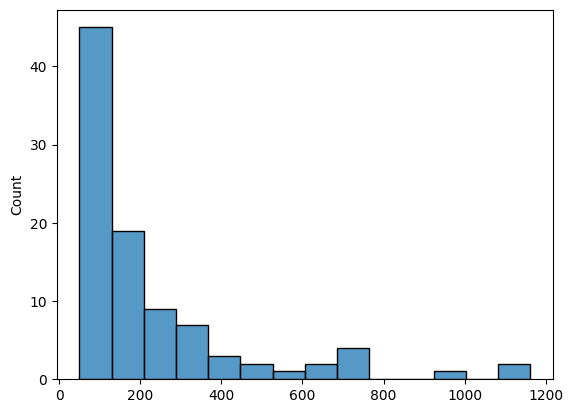

In [597]:
sns.histplot(np.sum(subject_vector, axis = 0))

In [598]:
train_data4 = pd.concat([train_data3,subject_vector],axis=1)
train_data4.drop(columns=[], inplace=True)

Drop original columns and get the final DataFrame:

In [599]:
train_data4.drop(columns=['statement', 'stemmed_statement_token','context', 'stemmed_context_token','subject', 'stemmed_subject_token'], inplace=True)

In [600]:
train_data4.shape

(10240, 387)

In [601]:
train_data4.head(10)

,ID,label_6,speaker,speaker_job,state,party,pof_count,false_count,barelytrue_count,halftrue_count,...,sj_transpar,sj_transport,sj_union,sj_veteran,sj_votingrecord,sj_water,sj_wealth,sj_welfar,sj_women,sj_worker
0,2635.json,1,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10540.json,3,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,324.json,4,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,...,0,0,0,0,0,0,0,0,0,0
3,1123.json,1,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,9028.json,3,charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,...,0,0,0,0,0,0,0,0,0,0
5,12465.json,5,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6,2342.json,2,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,153.json,3,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,...,0,0,0,0,0,0,0,0,0,0
8,5602.json,3,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,9741.json,4,duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


# Training Data Cleaning and Encoding

In [602]:
print(np.sum(train_data4.isnull(),axis = 0)) 

ID                0
label_6           0
speaker           2
speaker_job    2898
state          2210
               ... 
sj_water          0
sj_wealth         0
sj_welfar         0
sj_women          0
sj_worker         0
Length: 387, dtype: int64


First, we ignore the speaker's name and focus on their past speech counts. Even if the counts themselves may not determine if they will speak the truth in the future or not. But in terms of our work, they can serve as vectors determining who is which person. Then, for speaker jobs and their states, we deem that they are less likely to contribute to the model comparing to other atributes.

In [603]:
# drop unnescessary columns
train_data4.drop(columns = ['speaker','speaker_job','state'],inplace = True)

Next, there are some null for the counts:

In [604]:
np.sum(train_data4[['pof_count','false_count','barelytrue_count','halftrue_count','mostlytrue_count']].isnull(),axis = 0)

pof_count           2
false_count         2
barelytrue_count    2
halftrue_count      2
mostlytrue_count    2
dtype: int64

Assume that these are caused by unknown speaker, simply set them to 0.

In [605]:
train_data4['pof_count'].fillna(0, inplace = True)
train_data4['false_count'].fillna(0, inplace = True)
train_data4['barelytrue_count'].fillna(0, inplace = True)
train_data4['halftrue_count'].fillna(0, inplace = True)
train_data4['mostlytrue_count'].fillna(0, inplace = True)

Then, One-Hot encode party.

In [606]:
train_data4 = pd.get_dummies(train_data4, prefix='party', columns=['party'], drop_first=False)

In [607]:
train_data4.head(10)

,ID,label_6,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,label_2,label_3,st_abort,...,party_liberal-party-canada,party_libertarian,party_newsmaker,party_none,party_ocean-state-tea-party-action,party_organization,party_republican,party_state-official,party_talk-show-host,party_tea-party-member
0,2635.json,1,0.0,1.0,0.0,0.0,0.0,0,0,1,...,False,False,False,False,False,False,True,False,False,False
1,10540.json,3,0.0,0.0,1.0,1.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,324.json,4,70.0,71.0,160.0,163.0,9.0,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3,1123.json,1,7.0,19.0,3.0,5.0,44.0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,9028.json,3,15.0,9.0,20.0,19.0,2.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
5,12465.json,5,0.0,3.0,2.0,5.0,1.0,1,2,0,...,False,False,False,False,False,False,True,False,False,False
6,2342.json,2,3.0,1.0,1.0,3.0,1.0,0,1,0,...,False,False,False,False,False,False,True,False,False,False
7,153.json,3,70.0,71.0,160.0,163.0,9.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
8,5602.json,3,0.0,0.0,1.0,0.0,1.0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
9,9741.json,4,0.0,0.0,0.0,1.0,0.0,1,2,0,...,False,False,False,False,False,False,True,False,False,False


# CV and Test Sets Preparation

Apply BoW, vectorizer, and one-hot encoding to cv and test set without word counts threshold and cut-offs. Then, mask the columns with ones from the training set, such that the columns that do not appear in the training set are dropped. For columns that do not exist in the cv and test set, add them and set their values to zero.

In [608]:
# fill nulls
cv_data["subject"].fillna(value = "unknown", inplace=True)
cv_data["context"].fillna(value = "unknown", inplace=True)
test_data["subject"].fillna(value = "unknown", inplace=True)
test_data["context"].fillna(value = "unknown", inplace=True)

cv_data['pof_count'].fillna(0, inplace = True)
cv_data['false_count'].fillna(0, inplace = True)
cv_data['barelytrue_count'].fillna(0, inplace = True)
cv_data['halftrue_count'].fillna(0, inplace = True)
cv_data['mostlytrue_count'].fillna(0, inplace = True)

test_data['pof_count'].fillna(0, inplace = True)
test_data['false_count'].fillna(0, inplace = True)
test_data['barelytrue_count'].fillna(0, inplace = True)
test_data['halftrue_count'].fillna(0, inplace = True)
test_data['mostlytrue_count'].fillna(0, inplace = True)

In [609]:
# tokenize statement
cv_data["stemmed_statement_token"] = tokenize_and_stem(cv_data['statement'])
test_data["stemmed_statement_token"] = tokenize_and_stem(test_data['statement'])

# tokenize context
cv_data["stemmed_context_token"] = tokenize_and_stem(cv_data['context'])
test_data["stemmed_context_token"] = tokenize_and_stem(test_data['context'])

# turn commas to blank spaces for subjects
cv_data['subject'].replace(',',' ',regex=True,inplace=True) 
test_data['subject'].replace(',',' ',regex=True,inplace=True)  

# tokenize subject
cv_data["stemmed_subject_token"] = tokenize_and_stem(cv_data['subject'])
test_data["stemmed_subject_token"] = tokenize_and_stem(test_data['subject'])

Apply the countvectorizer based on what we have done for the training set via transform.

# Naive Bayes


# KNN

# Logistic Regression

# Test

In [611]:
train_data4.head(10).filter(regex='statement').columns

Index(['ct_statement'], dtype='object')

In [612]:
train_data4.head(10)

,ID,label_6,pof_count,false_count,barelytrue_count,halftrue_count,mostlytrue_count,label_2,label_3,st_abort,...,party_liberal-party-canada,party_libertarian,party_newsmaker,party_none,party_ocean-state-tea-party-action,party_organization,party_republican,party_state-official,party_talk-show-host,party_tea-party-member
0,2635.json,1,0.0,1.0,0.0,0.0,0.0,0,0,1,...,False,False,False,False,False,False,True,False,False,False
1,10540.json,3,0.0,0.0,1.0,1.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,324.json,4,70.0,71.0,160.0,163.0,9.0,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3,1123.json,1,7.0,19.0,3.0,5.0,44.0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,9028.json,3,15.0,9.0,20.0,19.0,2.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
5,12465.json,5,0.0,3.0,2.0,5.0,1.0,1,2,0,...,False,False,False,False,False,False,True,False,False,False
6,2342.json,2,3.0,1.0,1.0,3.0,1.0,0,1,0,...,False,False,False,False,False,False,True,False,False,False
7,153.json,3,70.0,71.0,160.0,163.0,9.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
8,5602.json,3,0.0,0.0,1.0,0.0,1.0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
9,9741.json,4,0.0,0.0,0.0,1.0,0.0,1,2,0,...,False,False,False,False,False,False,True,False,False,False


In [613]:
train_data4.head(10).filter(regex='statement')

,ct_statement
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [614]:
#sns.pairplot(train_data4[['pof_count','false_count','barelytrue_count','halftrue_count','mostlytrue_count','context_ad','label_2']],hue = 'label_2')

In [615]:
from copy import deepcopy
df_test = deepcopy(train_data)
df_test['subject'] = train_data['subject'].mask(train_data.groupby('subject')['subject'].transform('size').lt(60), 'Others')
df_test.drop(df_test[df_test['subject'] ==  'Others'].index, inplace = True)

Show unique value for "context"

Show all rows that contain:

In [616]:
np.sum(test_data.filter(regex='count').isnull(),axis = 0)

pof_count           0
false_count         0
barelytrue_count    0
halftrue_count      0
mostlytrue_count    0
dtype: int64